# 1. Inroduction

## 1.1. Problem statement

# 2. Importing Libraries

These are collection of functions and methods that allows for performance of many actions without writing the code.

In [1]:
# reading in data
import re
import string
import numpy as np 
import random
import pandas as pd 

#Vissualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go # pip install plotly==4.8.1
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #pip install wordcloud

#Preprocessing
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
nltk.download('averaged_perceptron_tagger')
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

#modeling
from sklearn.feature_extraction.text import CountVectorizer

#csv paths
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/kaggle/input/climate-change-belief-analysis/sample_submission.csv
/kaggle/input/climate-change-belief-analysis/test.csv
/kaggle/input/climate-change-belief-analysis/train.csv


Below is a helper Function which generates random colors which will be used to give different colors to the plots.

In [2]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating 
        the number of colours which are going to be 
        generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# 3. Getting Data

The data is given in the format csv files, pandas are used to import and convert the csv files to panda data frame.

In [3]:
# Load dataset
train_df = pd.read_csv('/kaggle/input/climate-change-belief-analysis/train.csv')
test_df = pd.read_csv('/kaggle/input/climate-change-belief-analysis/test.csv')
ss_df = pd.read_csv('/kaggle/input/climate-change-belief-analysis/sample_submission.csv')

# 4. Data Desciption

Below is just the over view of the data frames and thier contents.

In [4]:
print('This is the Train data frame')
print(train_df.head(4))
print('')
print('This is the Test data frame')
print(test_df.head(4))

This is the Train data frame
   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736

This is the Test data frame
                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263


Both data frames have message and tweetid columns, the difference is that the train data frame has sentiment column and test data frame does not.

In [5]:
ss_df.head(4)

tweetid  sentiment
0   169760          1
1    35326          1
2   224985          1
3   476263          1

Above is the Sample submission data frame, which is just a guide on how the submission should be made. It has only two columns, the tweetid and the sentiment.

In [6]:
print('___basic info of the train data___')
print(train_df.info())
print('Dataset size:', train_df.shape)
print('Columns are:',train_df.columns)


___basic info of the train data___
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None
Dataset size: (15819, 3)
Columns are: Index(['sentiment', 'message', 'tweetid'], dtype='object')


Looking at the train dataframe basic information, it shows that there are 15819 entries, 0 to 15818.The sentiment and the tweetid are intigers and the sentiment is an object. so the shape is 15819 entries by 3 columns

# 5 Exploratory Data Analysis on Raw data

## 5.1. Taking a closer look at the distribution of tweeter messages in the train set.

In [7]:
temp = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp['percentage'] = round((temp['message']/temp['message'].sum())*100,0)
temp.style.background_gradient(cmap='Purples')

In [8]:
fig = px.funnel(temp, x='sentiment', y='message',color='sentiment')
fig.show()

The table and the funnel display the count and percentage of message in the train data frame. Sentiment 1 has the highest count of message of 8530 which is 54% of the whole message and negative sentiment (-1) has the lowest count of 1296 which is 8% of the whole messages. 

## 5.2. Wordcloud Visualization

This is a popular visualization of words.

(-0.5, 399.5, 199.5, -0.5)

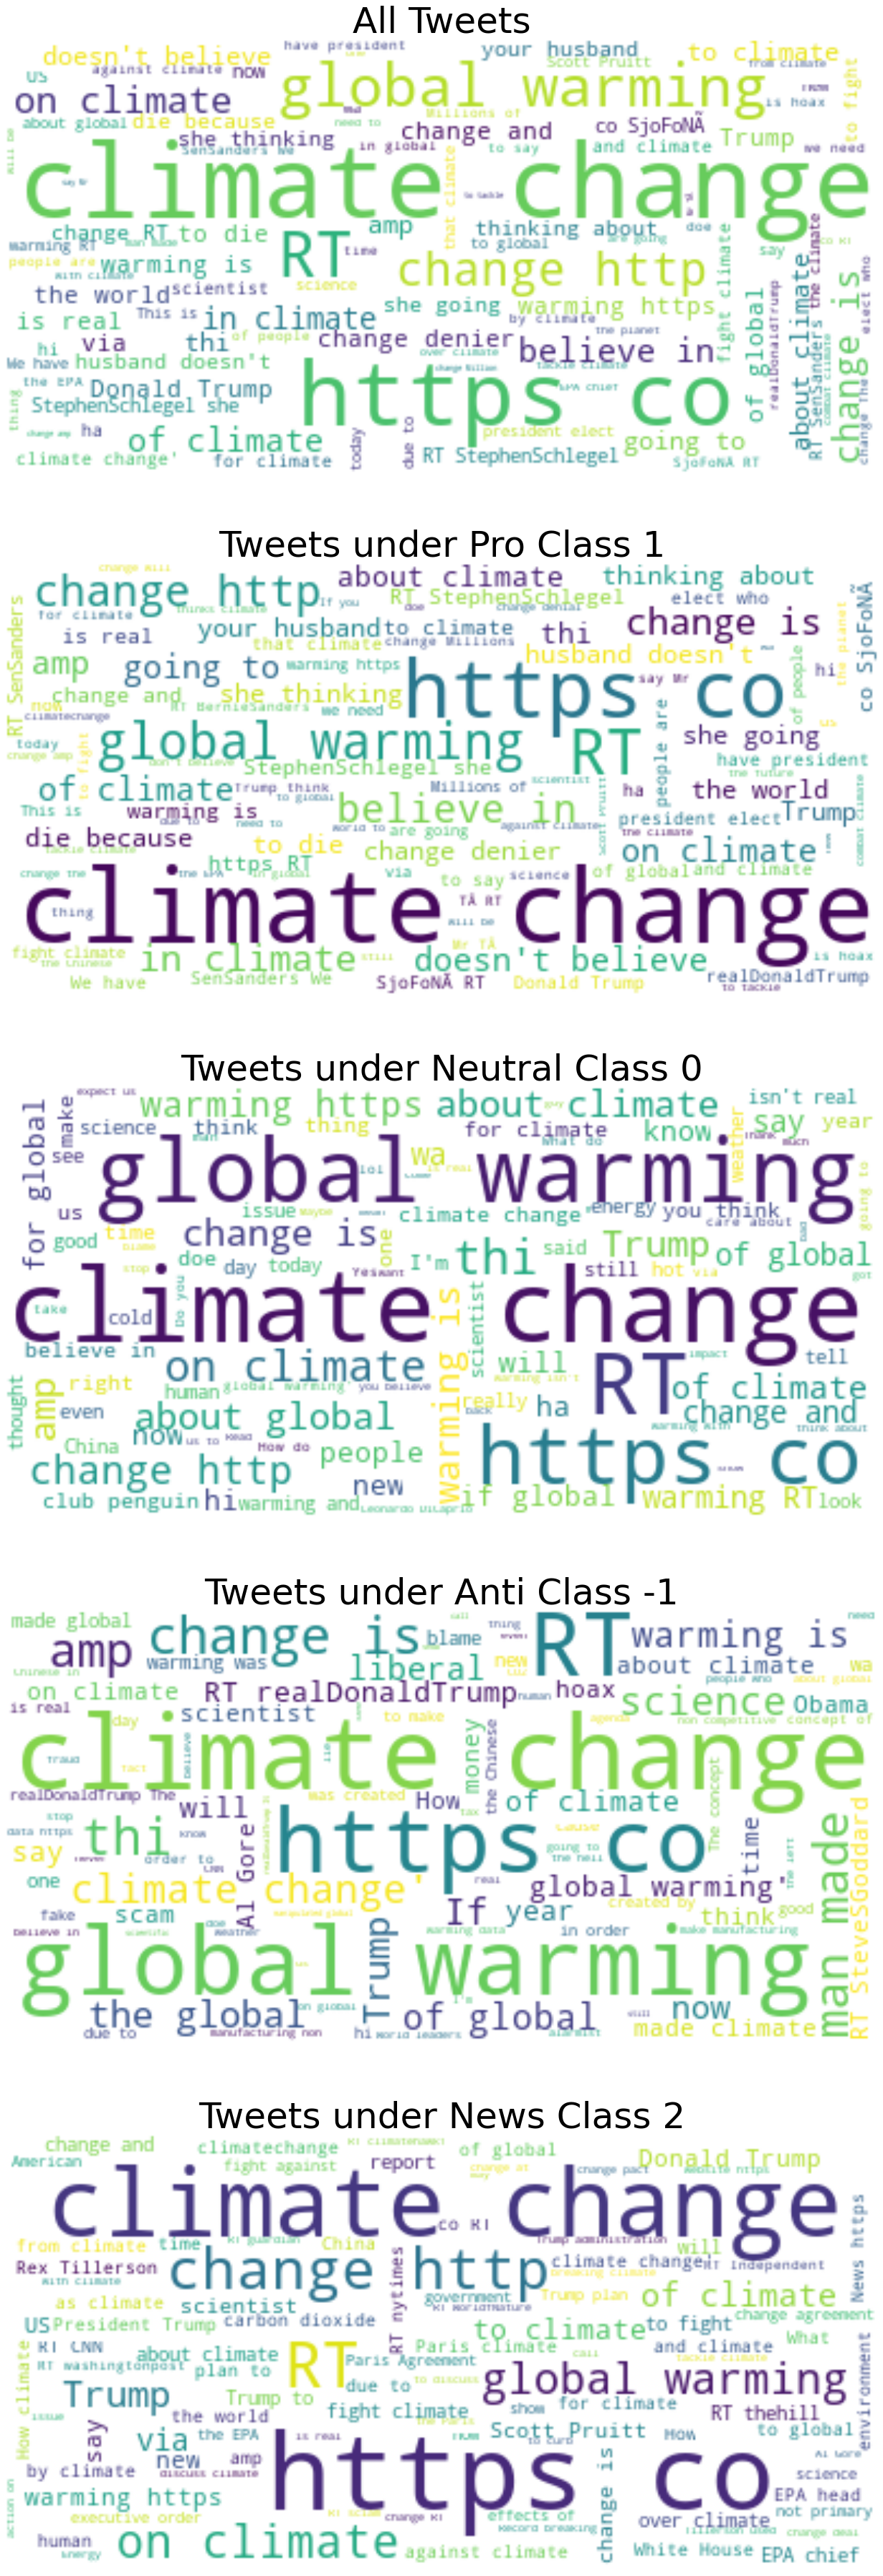

In [9]:
#pd.set_option('display.max_colwidth', 60)
# visualising the messages 
df_senti1 = train_df[train_df['sentiment']==1]
df_senti0 = train_df[train_df['sentiment']==0]
df_senti_neg1 = train_df[train_df['sentiment']==-1]
df_senti2 = train_df[train_df['sentiment']==2]
tweet_All = " ".join(review for review in train_df.message)
tweet_senti1 = " ".join(review for review in df_senti1.message)
tweet_senti0 = " ".join(review for review in df_senti0.message)
tweet_senti_neg1 = " ".join(review for review in df_senti_neg1.message)
tweet_senti2 = " ".join(review for review in df_senti2.message)

fig, ax = plt.subplots(5, 1, figsize  = (65,65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti1)
wordcloud_0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti0)
wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti_neg1)
wordcloud_2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Tweets under Pro Class 1',fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Tweets under Neutral Class 0',fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Tweets under Anti Class -1',fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('Tweets under News Class 2',fontsize=50)
ax[4].axis('off')

The Wordcloud Visualization display top 100 words from the whole message column and semtimentwise.The size of the words is related to how frequent the word occured in the messages,the bigger the word the more frequent it appeared in the messages.

* All tweet message 
some of the most occuring words in all tweets are 'climate change, is, https, CO, RT and global warming'

* Tweets messages under Pro sentiment(1)
most common words here 'global warming, https, RT,CO Believe, doesnt believe'

* tweets under sentiment 0 the Neutral
most common words are global warming, CO, Https,Rt
* tweets under sentiment -1 the Anti
common words oare 'Co,RT,Https, Trump, man  made, global warming'
* tweets under sentiment 2 the News
common words are 'Co,RT,Https, Trump, global warming, via

This is interesting because some of the words such as belive ,Trump are only common in certain sentiments. the RT refers to retweets and the https is the hyper link on the tweet.

It can be concluded that there are lot of retweets in the data frame. Retweets are just repetions of an original post on twitter shared by different users. This means that a person sharing the retweet is just supporting the origional post. the name Trump which is the name of US president seems to appear more often awell. Words such as climate, global warming related to the problem statement of this project unlike other words such as 'via, is, https' which are frequently occuring from the tweets.




### Checking top common words by count

diving deeper to check count of some common words from the tweet messages

In [82]:
# Checking top 20 common words from all tweets
train_df['temp_list'] = train_df['message'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [83]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Raw message', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Common_words', 'count'] but received: blue

Climate RT and Change are still top most occuring words in the tweets.Whats new here is that common words such as 'The,to, of ,is ,a'are now showeing to be appearing more often aswell. 

In [12]:
#defining the sentiments so that each sentiment can be explored
Pro = train_df[train_df['sentiment']==1]
Anti = train_df[train_df['sentiment']== -1]
Neutral = train_df[train_df['sentiment']==0]
News = train_df[train_df['sentiment']== 2]

In [13]:
#MosT common positive words(Pro)
top = Counter([item for sublist in Pro['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Oranges')

# 6 Data cleaning and Preprocessing

In [14]:
#MosT common negative words(Anti)
top = Counter([item for sublist in Anti['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [15]:
#MosT common words in Neutral sentiment
top = Counter([item for sublist in Neutral['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [16]:
#MosT common words in News sentiment
top = Counter([item for sublist in News['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

# 6. Data cleaning and Preprocessing

### 6.1. Cleaning Data

In [17]:
def cleaning(text):
    '''The Function change contraction words to thier full format(eg did'nt ti did not), lowers 
    all text to lower case format, makes 
    text lowercase,removes links(https), 
    removes punctuation(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
    , removes words containing numbers and words that are attachec with #tag.'''
    
    contractions_dict = {"ain't": "am not / are not / is not / has not / have not",
                         "aren't": "are not / am not","can't": "cannot","can't've": "cannot have",
                         "'cause": "because","could've": "could have","couldn't": "could not",
                         "couldn't've": "could not have","didn't": "did not","doesn't": "does not",
                         "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                         "hasn't": "has not","haven't": "have not","he'd": "he had / he would",
                         "he'd've": "he would have","he'll": "he shall / he will",
                         "he'll've": "he shall have / he will have","he's": "he has / he is",
                         "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                         "how's": "how has / how is / how does","I'd": "I had / I would",
                         "I'd've": "I would have","I'll": "I shall / I will",
                         "I'll've": "I shall have / I will have","I'm": "I am","I've": "I have",
                         "isn't": "is not","it'd": "it had / it would","it'd've": "it would have",
                         "it'll": "it shall / it will","it'll've": "it shall have / it will have",
                         "it's": "it has / it is","let's": "let us","ma'am": "madam","mayn't": "may not",
                         "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                         "must've": "must have","mustn't": "must not","mustn't've": "must not have",
                         "needn't": "need not","needn't've": "need not have","o'clock": "of the clock",
                         "oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not",
                         "sha'n't": "shall not","shan't've": "shall not have","she'd": "she had / she would",
                         "she'd've": "she would have",
                         "she'll": "she shall / she will","she'll've": "she shall have / she will have",
                         "she's": "she has / she is","should've": "should have","shouldn't": "should not",
                         "shouldn't've": "should not have","so've": "so have","so's": "so as / so is",
                         "that'd": "that would / that had","that'd've": "that would have","that's": "that has / that is",
                         "there'd": "there had / there would","there'd've": "there would have",
                         "there's": "there has / there is","they'd": "they had / they would",
                         "they'd've": "they would have","they'll": "they shall / they will",
                         "they'll've": "they shall have / they will have","they're": "they are",
                         "they've": "they have","to've": "to have","wasn't": "was not",
                         "we'd": "we had / we would","we'd've": "we would have",
                         "we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have",
                         "weren't": "were not","what'll": "what shall / what will",
                         "what'll've": "what shall have / what will have",
                         "what're": "what are","what's": "what has / what is",
                         "what've": "what have","when's": "when has / when is","when've": "when have",
                         "where'd": "where did","where's": "where has / where is",
                         "where've": "where have","who'll": "who shall / who will",
                         "who'll've": "who shall have / who will have",
                         "who's": "who has / who is","who've": "who have",
                         "why's": "why has / why is","why've": "why have","will've": "will have",
                         "won't": "will not","won't've": "will not have","would've": "would have",
                         "wouldn't": "would not","wouldn't've": "would not have",
                         "y'all": "you all","y'all'd": "you all would",
                         "y'all'd've": "you all would have","y'all're": "you all are",
                         "y'all've": "you all have","you'd": "you had / you would",
                         "you'd've": "you would have","you'll": "you shall / you will",
                         "you'll've": "you shall have / you will have","you're": "you are",
                         "you've": "you have"}

    for word in text.split():
        if word.lower() in contractions_dict:
            text = text.replace(word,contractions_dict[word.lower()])
    text = str(text).lower() #Make text lowercase
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())# remove @user, #word and link
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) ##remove punctuation
    text = re.sub('\n', '', text)
    text = ''.join([i for i in text[:] if not i.isdigit()]) #remove numbers
    return text

train_df['clean_message'] = train_df['message'].apply(lambda x: cleaning(x))
test_df['clean_message'] = test_df['message'].apply(lambda x: cleaning(x))

In [18]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...   
1  [It's, not, like, we, lack, evidence, of, anth...   
2  [RT, @RawStory:, Researchers, say, we, have, t...   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...   
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...   

                                       clean_message  
0  polyscimajor epa chief does not think carbon d...  
1  it has it is not like we lack evidence of anth...  
2  rt researchers say we have three years to act ...  
3  wired  was a pivotal year in the war on climat...  
4  rt it has it is  and a racist sexist climate c...

## 6.2. Preprocessing

### 6.2.1. Lemmatisation


The purpose of Lemmatization is to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

In [19]:
nlp = spacy.load("en_core_web_lg")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [20]:
train_df["lemmaa"] =train_df.apply(lambda x: lemmatizer(x['clean_message']), axis=1)
test_df["lemmaa"] =test_df.apply(lambda x: lemmatizer(x['clean_message']), axis=1)

In [21]:
train_df.head() 

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...   
1  [It's, not, like, we, lack, evidence, of, anth...   
2  [RT, @RawStory:, Researchers, say, we, have, t...   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...   
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  
0  polyscimajor epa chief do not think carbon dio...  
1  -PRON- have -PRON- be not like -PRON- lack evi...  
2  rt researcher say -PRON- have three year to ac...  
3  wired   be a pivotal year in the war on climat...  
4  rt -PRON- have -PRON- be   and a racist sexist...

### 6.2.2. Removing the PRON and rt form column lemmaa

In [22]:
def remove(text):
    '''removing the words -PRON- and rt'''
    text = re.sub(r'-PRON-','',text)
    text = re.sub(r'rt' , '' , text) 
    return text

In [23]:
train_df['clean_lemma'] = train_df['lemmaa'].apply(lambda x: remove(x))
test_df['clean_lemma'] = test_df['lemmaa'].apply(lambda x: remove(x))
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...   
1  [It's, not, like, we, lack, evidence, of, anth...   
2  [RT, @RawStory:, Researchers, say, we, have, t...   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...   
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  
0  polyscimajor epa chief do not think carbon dio...  
1   have  be not like  lack evidence of anthropog...  
2   researcher say  have three year to act on cli...  
3  wired   be a pivotal year in the war on climat...  
4    have  be   and a racist sexist climate chang...

### 6.2.3. Tokenizing

In [24]:
from nltk.tokenize import word_tokenize
def tokenization(text):
    '''split the message into taken of words'''
    text = word_tokenize(text)
    return text

In [25]:
train_df['tokenized_message'] = train_df['clean_lemma'].apply(lambda x: tokenization(x.lower()))
test_df['tokenized_message'] = test_df['clean_lemma'].apply(lambda x: tokenization(x.lower()))
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...   
1  [It's, not, like, we, lack, evidence, of, anth...   
2  [RT, @RawStory:, Researchers, say, we, have, t...   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...   
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   
4    have  be   and a racist sexist climate chang...   

                                   tokenized_message  
0  [polyscimajor, epa, chief, do, not, think, car...  
1  [have, be, not, like, lack, evidence, of, anth...  
2  [researcher, say, have, three, year, to, act, ...  
3  [wired, be, a, pivotal, year, in, the, war, on...  
4  [have, be, and, a, racist, sexist, climate, ch...

### 6.2.4. Stop Words

In [26]:
stop = ['a', 'about', 'above','after', 'again', 'against', 'ain', 'all', 
        'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 
        'be', 'because', 'been', 'before', 'being','below', 'between', 
        'both', 'but', 'by', 'can', 'couldn',"couldn't", 'd', 'did', 'didn', 
        "didn't", 'do', 'does', 'doesn',"doesn't", 'doing', 'don', "don't",
        'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 
        "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 
        'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 
        'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 
        'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 
        'my', 'myself', 'needn', "needn't", 'no', 'nor','now', 'o', 'of', 'off', 
        'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 
        're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', 
        "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 
        'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
        'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 
        'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 
        'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', 
        "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

The word not is kept out of the stop words, this is because the word can help the mechine lean on the negative sentiment.

In [27]:
train_df['clean_stp_words'] = train_df['tokenized_message'].apply(lambda x: [item for item in x if item not in stop])
test_df['clean_stp_words'] = test_df['tokenized_message'].apply(lambda x: [item for item in x if item not in stop])
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...   
1  [It's, not, like, we, lack, evidence, of, anth...   
2  [RT, @RawStory:, Researchers, say, we, have, t...   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...   
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   
4    have  be   and a racist sexist climate chang...   

                                   tokenized_message  \
0  [polyscimajor, epa, chief, do, not, think, car...   
1  [have, be, not, like, lack, evidence, of, anth...   
2  [researcher, say, have, three, year, to, act, ...   
3  [wired, be, a, pivotal, year, in, the, war, on...   
4  [have, be, and, a, racist, sexist, climate, ch...   

                                     clean_stp_words  
0  [polyscimajor, epa, chief, not, think, carbon,...  
1  [not, like, lack, evidence, anthropogenic, glo...  
2  [researcher, say, three, year, act, climate, c...  
3       [wired, pivotal, year, war, climate, change]  
4  [racist, sexist, climate, change, deny, bigot,...

### 6.2.5. Detokinization

In [28]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok

def detokenization(text):
    '''counter slpit the message into taken of words'''
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized'] = train_df['clean_stp_words'].apply(lambda x: detokenization(x))
test_df['detokenized'] = test_df['clean_stp_words'].apply(lambda x: detokenization(x))

# 7. Creating features

## 7.1. Getting the number of clean words and comparing them with that  raw from the message and clean message columns.

In [29]:
#train data frame
train_df['Num_words_raw'] = train_df['message'].apply(lambda x:len(str(x).split())) 
train_df['Num_words_clean'] = train_df['clean_message'].apply(lambda x:len(str(x).split()))
#Difference in Number of words text and Selected Text
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] - train_df['Num_words_clean']) 
#test data frame
test_df['Num_words_raw'] = test_df['message'].apply(lambda x:len(str(x).split())) 
test_df['Num_words_clean'] = test_df['clean_message'].apply(lambda x:len(str(x).split())) 
#Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw'] - test_df['Num_words_clean'])

In [30]:
train_df.head(4)  

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   

                                           temp_list  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...   
1  [It's, not, like, we, lack, evidence, of, anth...   
2  [RT, @RawStory:, Researchers, say, we, have, t...   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   

                                   tokenized_message  \
0  [polyscimajor, epa, chief, do, not, think, car...   
1  [have, be, not, like, lack, evidence, of, anth...   
2  [researcher, say, have, three, year, to, act, ...   
3  [wired, be, a, pivotal, year, in, the, war, on...   

                                     clean_stp_words  \
0  [polyscimajor, epa, chief, not, think, carbon,...   
1  [not, like, lack, evidence, anthropogenic, glo...   
2  [researcher, say, three, year, act, climate, c...   
3       [wired, pivotal, year, war, climate, change]   

                                         detokenized  Num_words_raw  \
0  polyscimajor epa chief not think carbon dioxid...             19   
1  not like lack evidence anthropogenic global wa...             10   
2  researcher say three year act climate change late             19   
3              wired pivotal year war climate change             15   

   Num_words_clean  difference_in_wordsNo  
0               18                      1  
1               13                      3  
2               17                      2  
3               11                      4

two columns are created to show the total number of words before and after cleaning to gether with thier differences in words.

## 7.2. Jaccard score

### 7.2.1. Jaccard score compares members for two sets to see which members are shared and which are distinct. It's a measure of similarity for the two sets of data, with a range from 0% to 100%.

In [31]:
def jaccard(str1, str2): 
    '''It takes two strings can be two columns fro a df and returns intersection of twe two  divided by thier union'''
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [32]:
# on the train_df
results_jaccard=[]

for ind,row in train_df.iterrows():
    sentence1 = row.message
    sentence2 = row.clean_message

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [33]:
# Joining the jaccard score to the main data frame
jaccard = pd.DataFrame(results_jaccard,columns=["message","clean_message","jaccard_score"])
train_df = train_df.merge(jaccard,how='outer')

In [34]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...   
1  [It's, not, like, we, lack, evidence, of, anth...   
2  [RT, @RawStory:, Researchers, say, we, have, t...   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...   
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...   

                                       clean_message  \
0  polyscimajor epa chief does not think carbon d...   
1  it has it is not like we lack evidence of anth...   
2  rt researchers say we have three years to act ...   
3  wired  was a pivotal year in the war on climat...   
4  rt it has it is  and a racist sexist climate c...   

                                              lemmaa  \
0  polyscimajor epa chief do not think carbon dio...   
1  -PRON- have -PRON- be not like -PRON- lack evi...   
2  rt researcher say -PRON- have three year to ac...   
3  wired   be a pivotal year in the war on climat...   
4  rt -PRON- have -PRON- be   and a racist sexist...   

                                         clean_lemma  \
0  polyscimajor epa chief do not think carbon dio...   
1   have  be not like  lack evidence of anthropog...   
2   researcher say  have three year to act on cli...   
3  wired   be a pivotal year in the war on climat...   
4    have  be   and a racist sexist climate chang...   

                                   tokenized_message  \
0  [polyscimajor, epa, chief, do, not, think, car...   
1  [have, be, not, like, lack, evidence, of, anth...   
2  [researcher, say, have, three, year, to, act, ...   
3  [wired, be, a, pivotal, year, in, the, war, on...   
4  [have, be, and, a, racist, sexist, climate, ch...   

                                     clean_stp_words  \
0  [polyscimajor, epa, chief, not, think, carbon,...   
1  [not, like, lack, evidence, anthropogenic, glo...   
2  [researcher, say, three, year, act, climate, c...   
3       [wired, pivotal, year, war, climate, change]   
4  [racist, sexist, climate, change, deny, bigot,...   

                                         detokenized  Num_words_raw  \
0  polyscimajor epa chief not think carbon dioxid...             19   
1  not like lack evidence anthropogenic global wa...             10   
2  researcher say three year act climate change late             19   
3              wired pivotal year war climate change             15   
4  racist sexist climate change deny bigot lead poll             18   

   Num_words_clean  difference_in_wordsNo  jaccard_score  
0               18                      1       0.541667  
1               13                      3       0.692308  
2               17                      2       0.714286  
3               11                      4       0.733333  
4               18                      0       0.478261

# 8. Exploratory Data Analysis on Clean data

## 8.1. Word Visualization of clean tweet messages

(-0.5, 399.5, 199.5, -0.5)

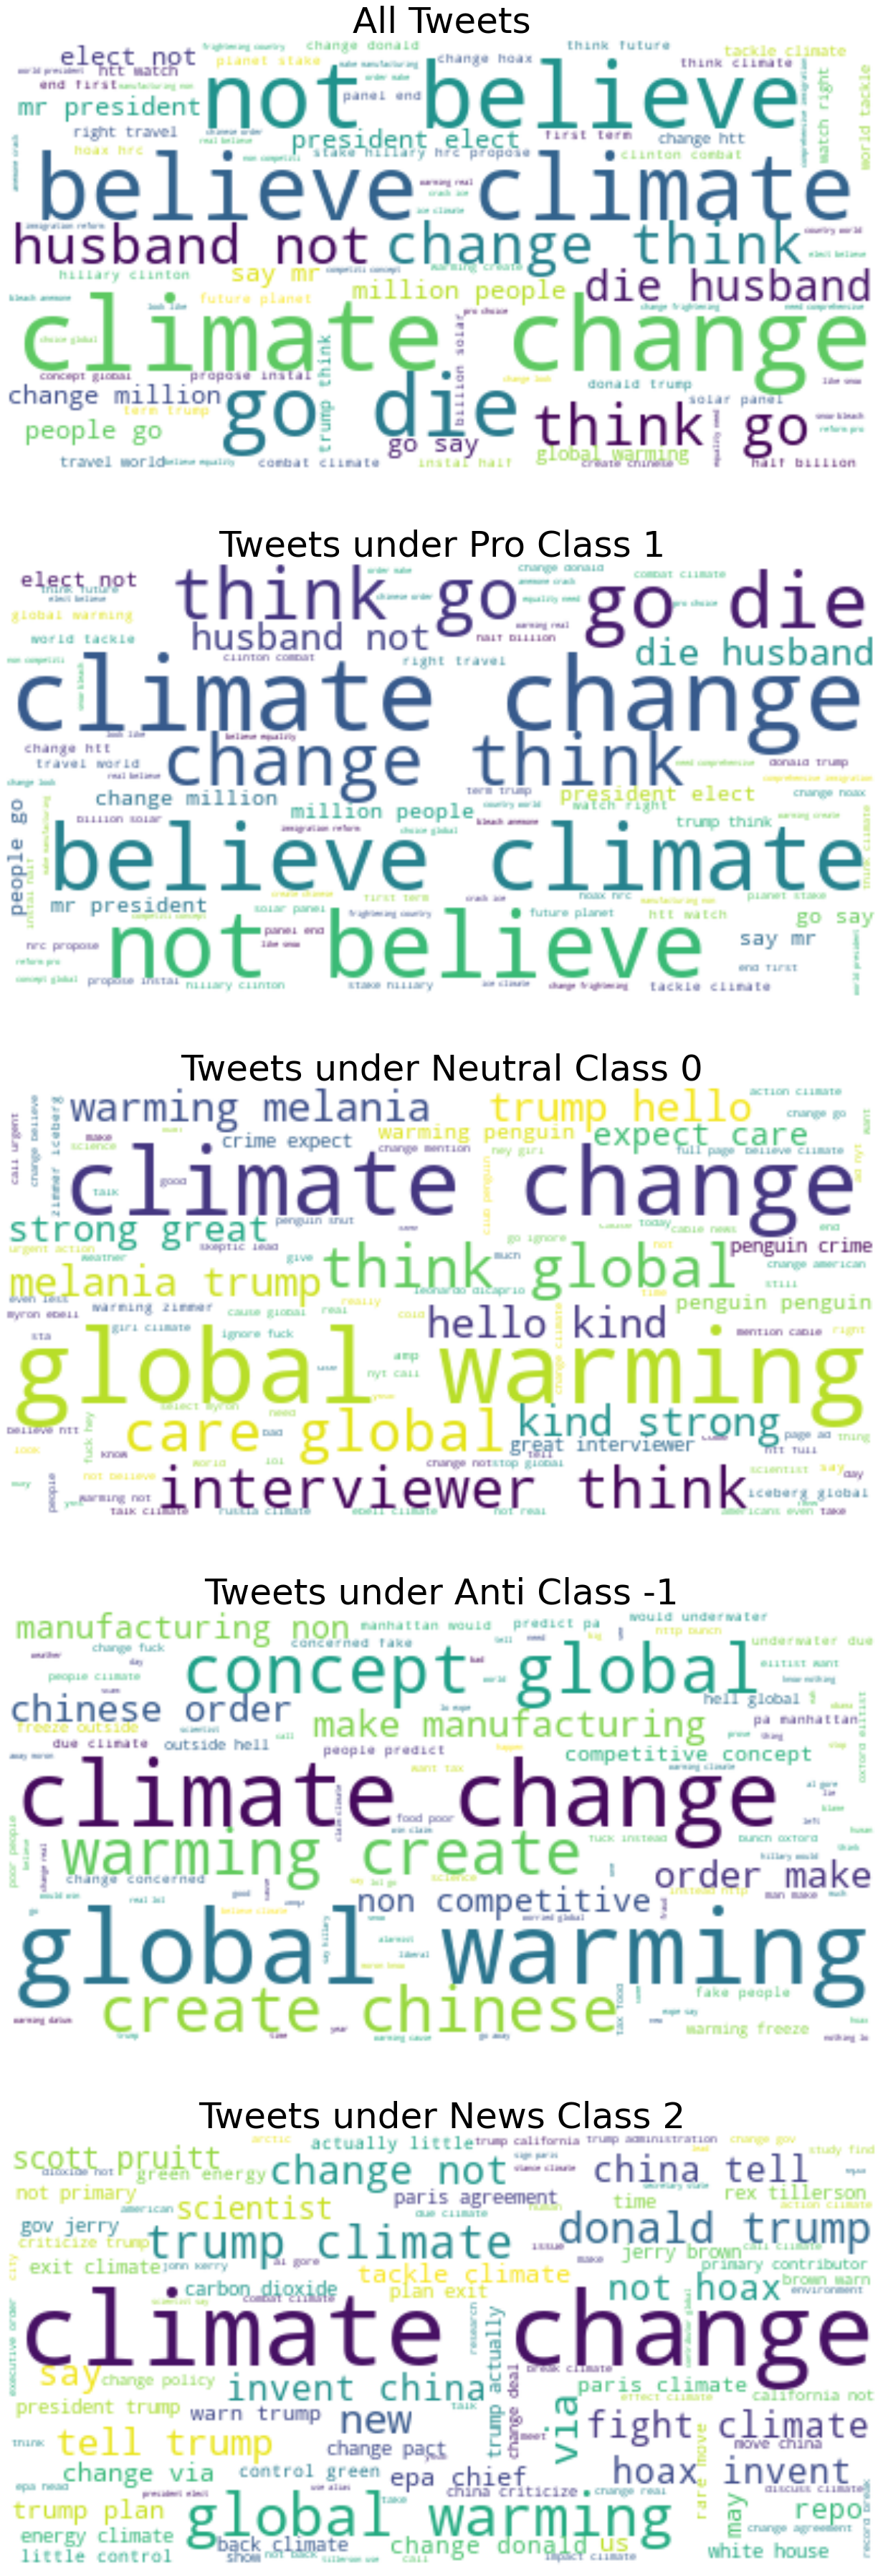

In [35]:
#pd.set_option('display.max_colwidth', 60)
# visualising the clean messages 
df_senti1 = train_df[train_df['sentiment']==1]
df_senti0 = train_df[train_df['sentiment']==0]
df_senti_neg1 = train_df[train_df['sentiment']==-1]
df_senti2 = train_df[train_df['sentiment']==2]
tweet_All = " ".join(review for review in train_df.detokenized)
tweet_senti1 = " ".join(review for review in df_senti1.detokenized)
tweet_senti0 = " ".join(review for review in df_senti0.detokenized)
tweet_senti_neg1 = " ".join(review for review in df_senti_neg1.detokenized)
tweet_senti2 = " ".join(review for review in df_senti2.detokenized)

fig, ax = plt.subplots(5, 1, figsize  = (65,65))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti1)
wordcloud_0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti0)
wordcloud_neg1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti_neg1)
wordcloud_2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_senti2)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=50)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Tweets under Pro Class 1',fontsize=50)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Tweets under Neutral Class 0',fontsize=50)
ax[2].axis('off')
ax[3].imshow(wordcloud_neg1, interpolation='bilinear')
ax[3].set_title('Tweets under Anti Class -1',fontsize=50)
ax[3].axis('off')
ax[4].imshow(wordcloud_2, interpolation='bilinear')
ax[4].set_title('Tweets under News Class 2',fontsize=50)
ax[4].axis('off')

## 8.2. Most Common words in clean message

In [36]:
train_df['temp_list0'] = train_df['detokenized'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list0'] for item in sublist])
temp0 = pd.DataFrame(top.most_common(20))
temp0.columns = ['Common_words','count']
temp0.style.background_gradient(cmap='Blues')

In [37]:
fig = px.bar(temp0, x="count", y="Common_words", title='Commmon Words in cleaned message', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

## 8.3. Most common words sentiment wise in clean message

In [38]:
#defining the sentiments so that each sentiment can be explored
Pro = train_df[train_df['sentiment']==1]
Anti = train_df[train_df['sentiment']== -1]
Neutral = train_df[train_df['sentiment']==0]
News = train_df[train_df['sentiment']== 2]

In [39]:
#MosT common positive words(Pro)
top = Counter([item for sublist in Pro['temp_list0'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [40]:
#MosT common words in Neutral sentiment
top = Counter([item for sublist in Neutral['temp_list0'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Greens')

In [41]:
#MosT common words in Neutral sentiment
top = Counter([item for sublist in Neutral['temp_list0'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [42]:
#MosT common words in News sentiment
top = Counter([item for sublist in News['temp_list0'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

## 8.4. Number of raw and clean message columns  

## 9. Below is modeling of the data

## 9.1. SUPPORT VECTOR MACHINES/CLASSIFICATION

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data provided, returning a "best fit" hyperplane that categorizes data.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
import sklearn.metrics as metrics


#### Building pipelines to vectorize the data, then train and fit a model

In [44]:
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

### Training on raw data

In [45]:
# defing the x and y varible
X= train_df['message']
y=train_df['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[  296    31    95    12]
 [   17   413   221    42]
 [   19    67 27888   138]
 [    3    12   138   667]]
              precision    recall  f1-score   support

          -1       0.88      0.68      0.77       434
           0       0.79      0.60      0.68       693
           1       0.98      0.99      0.99     28112
           2       0.78      0.81      0.79       820

    accuracy                           0.97     30059
   macro avg       0.86      0.77      0.81     30059
weighted avg       0.97      0.97      0.97     30059



### Training on clean message

In [46]:
# defing the x and y varible
X= train_df['detokenized']
y=train_df['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[  292    26    94    22]
 [   22   395   233    43]
 [   31    85 27839   157]
 [    3    23   174   620]]
              precision    recall  f1-score   support

          -1       0.84      0.67      0.75       434
           0       0.75      0.57      0.65       693
           1       0.98      0.99      0.99     28112
           2       0.74      0.76      0.75       820

    accuracy                           0.97     30059
   macro avg       0.83      0.75      0.78     30059
weighted avg       0.97      0.97      0.97     30059



### Training on clean message without retweet

In [47]:
# removing any repeated messages while keeping the first of those messages
new_df = train_df.drop_duplicates(subset=['detokenized'], keep='first')

In [48]:
# defing the x and y varible
X= new_df['detokenized']
y=new_df['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feeding the training data through the Linear SVC pipeline
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
dtknz_pred = text_clf_lsvc.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,dtknz_pred))
# Print a classification report
print(metrics.classification_report(y_test,dtknz_pred))

[[  93   31  105   18]
 [  21  137  218   39]
 [  32   98 1105  154]
 [   7   27  170  377]]
              precision    recall  f1-score   support

          -1       0.61      0.38      0.46       247
           0       0.47      0.33      0.39       415
           1       0.69      0.80      0.74      1389
           2       0.64      0.65      0.64       581

    accuracy                           0.65      2632
   macro avg       0.60      0.54      0.56      2632
weighted avg       0.64      0.65      0.64      2632



In all of the above Trainings, the model is better at predicting class 1, this is due to imbalance in classes.

## Downsampling the majority classes

Since the class Pro(1),News (2) and Neutral(0) has so many observations, thier sizes will be reduced by taking a small random subset of observations to match the size of the class Anti(-1). 

In [49]:
from sklearn.utils import resample

In [50]:
#assigning the sentiments
Pro = train_df[train_df['sentiment']==1]
Anti = train_df[train_df['sentiment']== -1]
Neutral = train_df[train_df['sentiment']==0]
News = train_df[train_df['sentiment']== 2]

In [51]:
# Downsample majority
Pro_downsampled = resample(Pro,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Anti), # match number in minority class
                          random_state=27) # reproducible results
Neutral_downsampled = resample(Neutral,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Anti), # match number in minority class
                          random_state=27) # reproducible results
News_downsampled = resample(News,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Anti), # match number in minority class
                          random_state=27) # reproducible results



# Combine downsampled majority class with minority class
downsampled = pd.concat([Pro_downsampled,Neutral_downsampled,News_downsampled,Anti])

In [52]:
temp = downsampled.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp['percentage'] = (temp['message']/temp['message'].sum())*100
temp

sentiment  message  percentage
0         -1     2218        25.0
1          0     2218        25.0
2          1     2218        25.0
3          2     2218        25.0

Now the sentiments are balanced

Training on downsampled clean message

In [53]:
downsampled.head(1)

sentiment                                            message  tweetid  \
14321          1  RT @StephenSchlegel: she's thinking about how ...    83329   

                                               temp_list  \
14321  [RT, @StephenSchlegel:, she's, thinking, about...   

                                           clean_message  \
14321  rt she has she is thinking about how she has s...   

                                                  lemmaa  \
14321  rt -PRON- have -PRON- be think about how -PRON...   

                                             clean_lemma  \
14321    have  be think about how  have  be go to die...   

                                       tokenized_message  \
14321  [have, be, think, about, how, have, be, go, to...   

                                         clean_stp_words  \
14321  [think, go, die, husband, not, believe, climat...   

                                           detokenized  Num_words_raw  \
14321  think go die husband not believe climate change             19   

       Num_words_clean  difference_in_wordsNo  jaccard_score  \
14321               24                      5       0.608696   

                                              temp_list0  
14321  [think, go, die, husband, not, believe, climat...

In [54]:
# defing the x and y varible
X= downsampled['detokenized']
y=downsampled['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[354  60   0  24]
 [ 49 315   4  44]
 [  6  11 431  12]
 [ 24  42   2 397]]
              precision    recall  f1-score   support

          -1       0.82      0.81      0.81       438
           0       0.74      0.76      0.75       412
           1       0.99      0.94      0.96       460
           2       0.83      0.85      0.84       465

    accuracy                           0.84      1775
   macro avg       0.84      0.84      0.84      1775
weighted avg       0.85      0.84      0.84      1775



The score has improved a lot, now all sentiments have better score above 74%

In [55]:
X_test = test_df['detokenized']
down_s_pred= text_clf_lsvc.predict(X_test)

In [56]:
down_s_pred = pd.DataFrame(data=down_s_pred,
                                 columns=['sentiment'],
                                 index=test_df['tweetid'])
down_s_pred.reset_index(inplace=True)

In [58]:
down_s_pred.to_csv(r"C:\Users\elton\Documents\Jm_team\Classification_Predict_Package\predictions_SVC\down_s_pred.csv", index=False)

### Now Downsampling the dataframe(new_df) without the retweets and train the model.

In [59]:
#assigning the sentiments
Pro = new_df[new_df['sentiment']==1]
Anti = new_df[new_df['sentiment']== -1]
Neutral = new_df[new_df['sentiment']==0]
News = new_df[new_df['sentiment']== 2]

In [60]:
# Downsample majority
Pro_downsampled = resample(Pro,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Anti), # match number in minority class
                          random_state=27) # reproducible results
Neutral_downsampled = resample(Neutral,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Anti), # match number in minority class
                          random_state=27) # reproducible results
News_downsampled = resample(News,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Anti), # match number in minority class
                          random_state=27) # reproducible results



# Combine downsampled majority class with minority class
downsampled2 = pd.concat([Pro_downsampled,Neutral_downsampled,News_downsampled,Anti])

In [61]:
temp = downsampled2.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp['percentage'] = (temp['message']/temp['message'].sum())*100
temp

sentiment  message  percentage
0         -1     1178        25.0
1          0     1178        25.0
2          1     1178        25.0
3          2     1178        25.0

it is observable that the classes have reduced since the retweets were dropped

In [62]:
# defing the x and y varible
X= downsampled2['detokenized']
y=downsampled2['sentiment']
# slpitting the X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[140  36  37  16]
 [ 51 117  39  25]
 [ 33  38 123  56]
 [ 13  21  38 160]]
              precision    recall  f1-score   support

          -1       0.59      0.61      0.60       229
           0       0.55      0.50      0.53       232
           1       0.52      0.49      0.51       250
           2       0.62      0.69      0.65       232

    accuracy                           0.57       943
   macro avg       0.57      0.57      0.57       943
weighted avg       0.57      0.57      0.57       943



the model now is perfoming worse, this may be because the model is underfed.

## Using SMOTE Algorithm

In [63]:
from sklearn.feature_extraction.text import *
tfidf_vectorizer = TfidfVectorizer(min_df=100)

In [69]:
#import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
# defing the x and y varible
X= train_df['detokenized']
y=train_df['sentiment']
 
sm = SMOTE(random_state = 2) 

X = tfidf_vectorizer.fit_transform(X)
X, y = sm.fit_sample(X, y.ravel()) 



In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
text_clf_lsvc = Pipeline([('clf', LinearSVC())])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[22101  4461    23  1618]
 [ 3160 21860    58  3114]
 [  480   589 26292   666]
 [  999  2779    47 24198]]
              precision    recall  f1-score   support

          -1       0.83      0.78      0.80     28203
           0       0.74      0.78      0.76     28192
           1       1.00      0.94      0.97     28027
           2       0.82      0.86      0.84     28023

    accuracy                           0.84    112445
   macro avg       0.84      0.84      0.84    112445
weighted avg       0.84      0.84      0.84    112445



In [73]:
#predicting the Time_from_Pickup_to_Arrival with unseen x test
X_test = test_df['detokenized']
X_test = tfidf_vectorizer.fit_transform(X_test)
#smote_pred = text_clf_lsvc.predict(X_test)

In [ ]:
print(X_test)

Smote without retweets

In [74]:
#import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
# defing the x and y varible
X= new_df['detokenized']
y=new_df['sentiment']
 
sm = SMOTE(random_state = 2) 

X = tfidf_vectorizer.fit_transform(X)
X, y = sm.fit_sample(X, y.ravel()) 




In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
text_clf_lsvc = Pipeline([('clf', LinearSVC())])
text_clf_lsvc.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
# Print a classification report
print(metrics.classification_report(y_test,predictions))

[[719 333 176 119]
 [237 728 227 202]
 [192 236 671 307]
 [101 185 132 952]]
              precision    recall  f1-score   support

          -1       0.58      0.53      0.55      1347
           0       0.49      0.52      0.51      1394
           1       0.56      0.48      0.51      1406
           2       0.60      0.69      0.65      1370

    accuracy                           0.56      5517
   macro avg       0.56      0.56      0.55      5517
weighted avg       0.56      0.56      0.55      5517

